In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
nyc = pd.read_csv('train.csv')

In [31]:
%time nyc.head()

Wall time: 0 ns


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [32]:
np.sqrt(4) == 4**0.5

True

In [ ]:
'''pickup_datetime — дата начала поездки
pickup_longitude — долгота исходного местоположения
pickup_latitude — широта исходного местоположения
dropoff_longitude — долгота пункта назначения
dropoff_latitude — широта пункта назначения
fare_amount — стоимость поездки в долларах
passenger_count — число пассажиров'''

In [ ]:
'''8-1'''

In [33]:
def haversine(p_long, p_lat, d_long, d_lat, r = 6371):
    p_long, p_lat, d_long, d_lat = [np.radians(i) for i in (p_long, p_lat, d_long, d_lat)]
    sliced = np.sin((d_lat - p_lat) / 2) ** 2 + (np.cos(p_lat) * np.cos(d_lat) * (np.sin((d_long - p_long) / 2) ** 2))
    return 2 * r * np.arcsin(sliced ** 0.5)

In [36]:
# df['distance'] = pd.Series(haversine(row['...'], ..., ..., ...) for i, row in nyc.iterrows())
%time nyc['distance'] = pd.Series(haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']) for i, row in nyc.iterrows())

Wall time: 3.03 s


In [38]:
%time nyc['distance'] = pd.Series(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude) for i, row in nyc.iterrows())

Wall time: 3.65 s


In [ ]:
'''8-2'''

In [39]:
%time nyc['distance'] = pd.Series(haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude) for row in nyc.itertuples())

Wall time: 648 ms


0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Length: 50000, dtype: float64

In [ ]:
'''8-3'''

In [47]:
%time nyc['distance'] = nyc.apply(lambda row: haversine(row.pickup_longitude, row.pickup_latitude, row.dropoff_longitude, row.dropoff_latitude), axis = 1)

Wall time: 2.09 s


In [45]:
longest = nyc.distance.max()

In [46]:
longest

8667.818812217454

In [ ]:
'''8-4'''

In [50]:
%time nyc['distance'] = haversine(nyc['pickup_longitude'], nyc['pickup_latitude'], nyc['dropoff_longitude'], nyc['dropoff_latitude'])

Wall time: 6 ms


In [49]:
nyc.distance

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
49995    4.940374
49996    0.874706
49997    2.263286
49998    0.665245
49999    0.000000
Name: distance, Length: 50000, dtype: float64

In [ ]:
'''8-5'''

In [52]:
%time nyc['distance'] = haversine(nyc['pickup_longitude'].values, nyc['pickup_latitude'].values, nyc['dropoff_longitude'].values, nyc['dropoff_latitude'].values)

Wall time: 5 ms


In [ ]:
'''8-7'''

In [53]:
nyc.query('distance == distance.max()')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
48996,2012-05-12 10:48:00.00000020,49.8,2012-05-12 10:48:00 UTC,-74.014917,40.713382,0.0,0.0,1,8667.818812


In [55]:
nyc.query('dropoff_longitude == 0 | dropoff_latitude == 0')

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00 UTC,0.0,0.0,0.0,0.0,3,0.0
15,2013-11-23 12:57:00.000000190,5.0,2013-11-23 12:57:00 UTC,0.0,0.0,0.0,0.0,1,0.0
26,2011-02-07 20:01:00.000000114,6.5,2011-02-07 20:01:00 UTC,0.0,0.0,0.0,0.0,1,0.0
124,2013-01-17 17:22:00.00000043,8.0,2013-01-17 17:22:00 UTC,0.0,0.0,0.0,0.0,2,0.0
192,2010-09-05 17:08:00.00000092,3.7,2010-09-05 17:08:00 UTC,0.0,0.0,0.0,0.0,5,0.0
...,...,...,...,...,...,...,...,...,...
49625,2012-01-09 19:50:27.0000001,12.1,2012-01-09 19:50:27 UTC,0.0,0.0,0.0,0.0,1,0.0
49816,2012-02-20 00:54:00.000000100,4.9,2012-02-20 00:54:00 UTC,0.0,0.0,0.0,0.0,1,0.0
49845,2009-03-02 21:57:15.0000001,6.6,2009-03-02 21:57:15 UTC,0.0,0.0,0.0,0.0,3,0.0
49856,2010-04-19 17:25:00.000000170,10.9,2010-04-19 17:25:00 UTC,0.0,0.0,0.0,0.0,5,0.0


In [ ]:
'''8-8'''

In [62]:
nyc_long_lat = nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]

<AxesSubplot:>

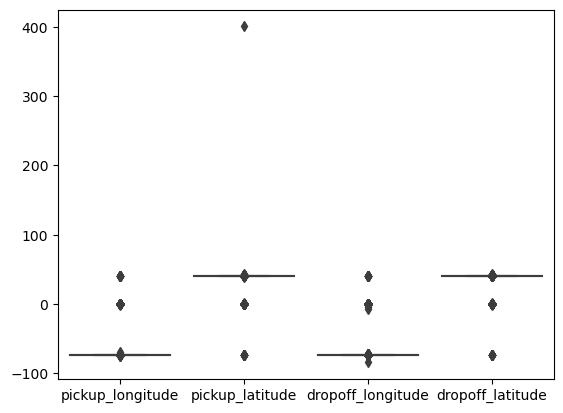

In [66]:
sns.boxplot(data=nyc_long_lat)

<AxesSubplot:>

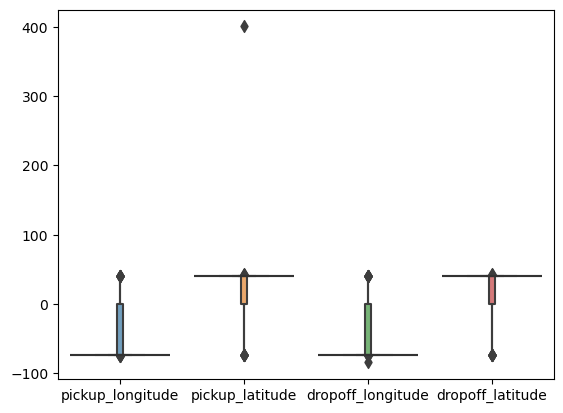

In [72]:
sns.boxenplot(data=nyc_long_lat)


In [108]:
sort_nyc = nyc_long_lat[['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] \
    .query('pickup_longitude < -60 & 10 < pickup_latitude < 120 & dropoff_longitude < -60 & 10 < dropoff_latitude')

<AxesSubplot:>

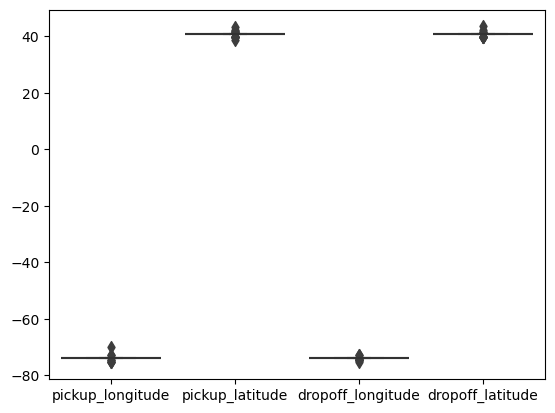

In [122]:
sns.boxenplot(data=sort_nyc)

array([[<AxesSubplot:title={'center':'dropoff_latitude'}>]], dtype=object)

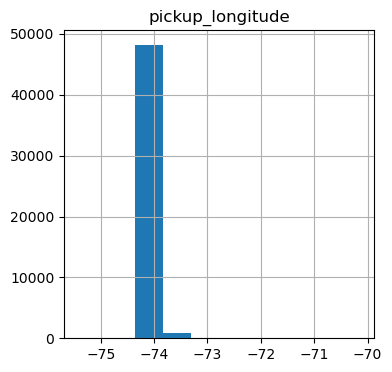

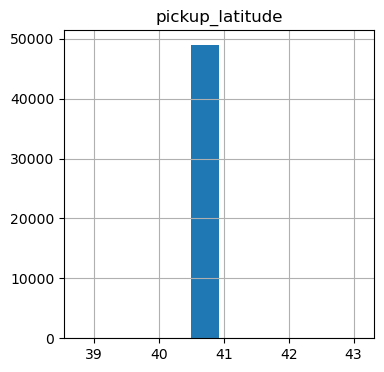

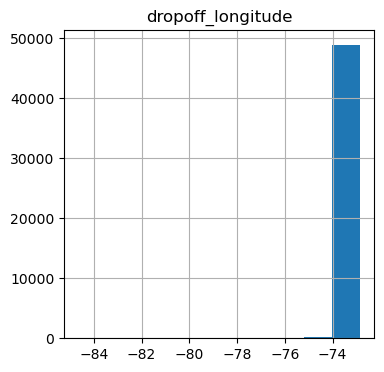

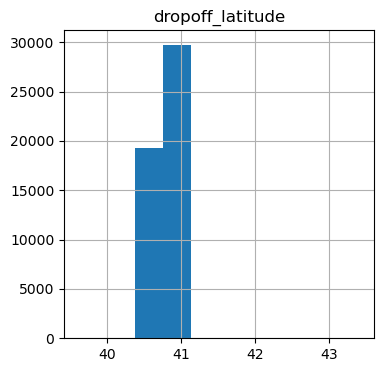

In [92]:
#sns.boxenplot(nyc.pickup_longitude)
nyc_long_lat.query('pickup_longitude < -60').hist (column='pickup_longitude',figsize=(4, 4))
nyc_long_lat.query('10 < pickup_latitude < 120').hist (column='pickup_latitude',figsize=(4, 4))
nyc_long_lat.query('dropoff_longitude < -60').hist (column='dropoff_longitude',figsize=(4, 4))
nyc_long_lat.query('10 < dropoff_latitude').hist (column='dropoff_latitude',figsize=(4, 4))

In [ ]:
'''10 < pickup_latitude < 120
pickup_longitude < -60
10 < dropoff_latitude
dropoff_longitude < -60'''

<AxesSubplot:>

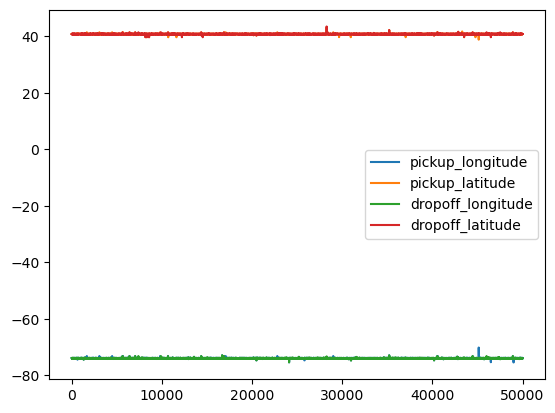

In [123]:
sort_nyc.plot()

In [132]:
nyc.query('distance < 50').query('distance == distance.max()').fare_amount

33502    136.0
Name: fare_amount, dtype: float64